In [4]:
cnfl=[false]
include("PVCR.jl")

┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(::PyObject) at PyCall.jl:399
└ @ PyCall /Users/arnavgautam/.julia/packages/PyCall/kAhnQ/src/PyCall.jl:399


12-element Array{Float64,1}:
 42.35930677572868 
 43.0785589650421  
 42.394224465839216
 45.343163807121606
 42.29728640436372 
 42.56605829576826 
 41.027884582241974
 40.784783966947366
 40.47773068077983 
 42.012421645464734
 43.00006019721416 
 40.152405298225425

In [14]:
include("functions/plotting_base_gd.jl")

plot_segmented_tariff_category_with_regression (generic function with 3 methods)

In [6]:
# Read in all of the utility bills for the various utilities and tariff types
base_GD = CSV.read("data/Base_GD.csv")

# Narrow down to {Residential | Commerical Industrial | Medium Voltage} ICE customers

all_ice = filter(row -> (!ismissing(row.EMPRESA) && row.EMPRESA == "ICE"), base_GD)

,ANNO,MES,ENERGIA_GENERADA,ENERGIA_DEPOSITADA,ENERGIA_RETIRADA,IMPORTE_POR_ENERGIA_RETIRADA
,Int64,Int64,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,2018,1,1511.0,774.0,741.0,19992.0
2,2018,2,1343.0,718.0,658.0,18332.0
3,2018,3,1537.0,665.0,753.0,20979.0
4,2018,4,1789.0,898.0,876.0,24405.0
5,2018,5,1623.0,944.0,796.0,22177.0
6,2018,6,1108.0,530.0,543.0,15128.0
7,2018,7,1398.0,632.0,685.0,18337.0
8,2018,8,1265.0,653.0,619.0,17245.0
9,2018,9,1321.0,753.0,648.0,18053.0


In [7]:
res_consumption = vcat(100:100:1500, 2000:500:4000)

44-element Array{Int64,1}:
   100
   200
   300
   400
   500
   600
   700
   800
   900
  1000
  1100
  1200
  1300
     ⋮
  3300
  3400
  3500
  3600
  3700
  4000
  5000
  6000
  7000
  8000
  9000
 10000

In [8]:
changing_apr_model_predictions = []
changing_apr_descriptions = []
for i in 0.085:0.005:0.12
    new_BAC1 = Financial(0.045, i, 5, 0.25, 600.0);
    res_model_predictions = []
    for (ix, co) in enumerate(res_consumption)
        ice_residential.econsumption = co; get_pmax(ice_residential);
        res = optimal_pv(ice_residential, PVRes, 0.0:2:30, new_BAC1, tariff_increase = true)
        push!(res_model_predictions, res[1][2])
    end
    push!(changing_apr_model_predictions, res_model_predictions)
    push!(changing_apr_descriptions, string("APR = ", i))
end

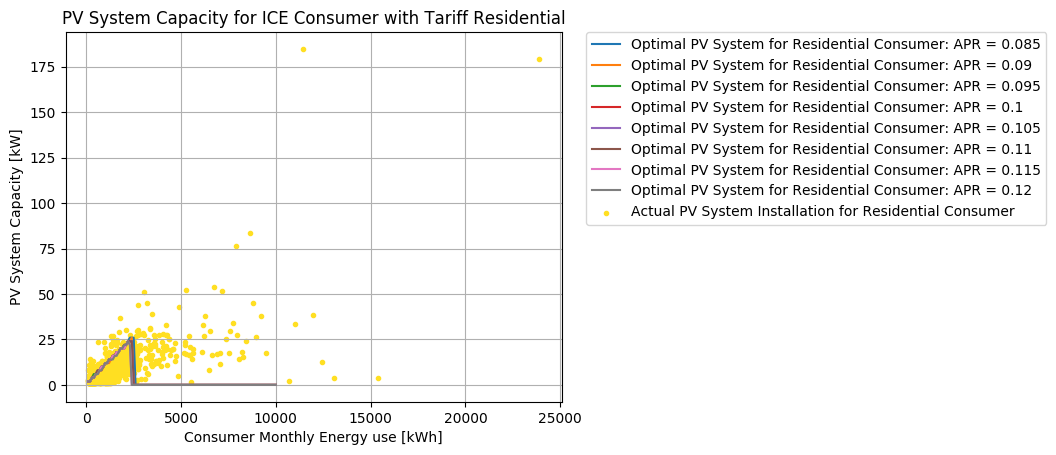

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [16]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, changing_apr_model_predictions; model_descriptions=changing_apr_descriptions)

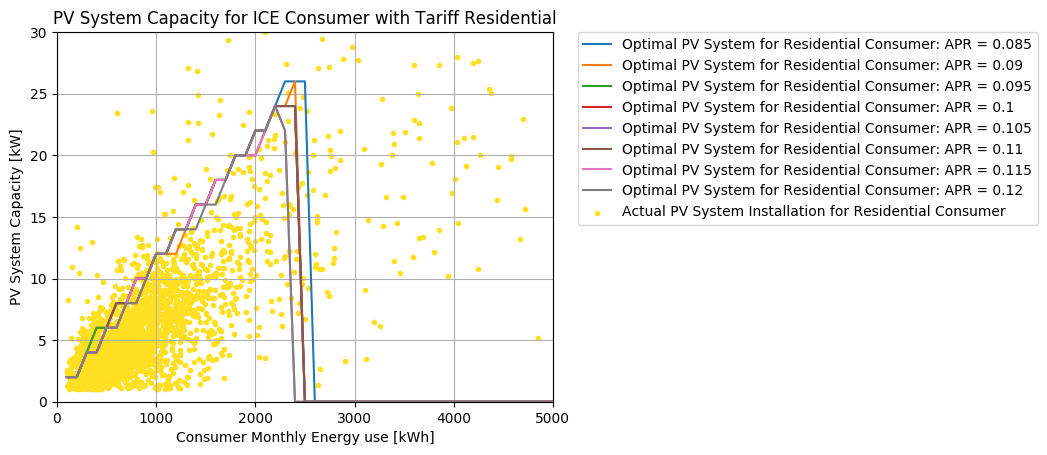

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [17]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, changing_apr_model_predictions; model_descriptions=changing_apr_descriptions, x_max=5000, y_max=30)

In [18]:
changing_years_model_predictions = []
changing_years_descriptions = []
for i in 3:1:5
    new_BAC1 = Financial(0.045, 0.085, i, 0.25, 600.0);
    res_model_predictions = []
    for (ix, co) in enumerate(res_consumption)
        ice_residential.econsumption = co; get_pmax(ice_residential);
        res = optimal_pv(ice_residential, PVRes, 0.0:2:30, new_BAC1, tariff_increase = true)
        push!(res_model_predictions, res[1][2])
    end
    push!(changing_years_model_predictions, res_model_predictions)
    push!(changing_years_descriptions, string("Years till payback = ", i))
end

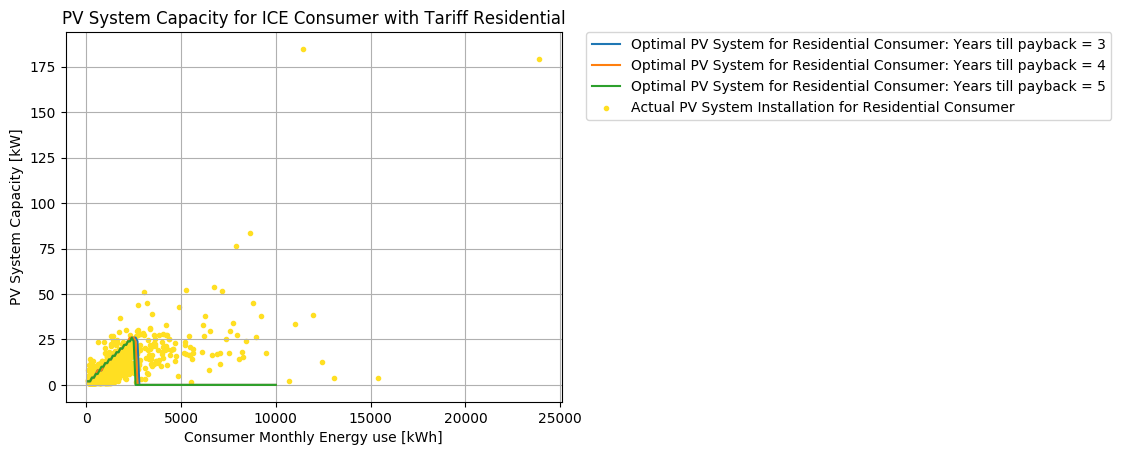

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [19]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, changing_years_model_predictions; model_descriptions=changing_years_descriptions)

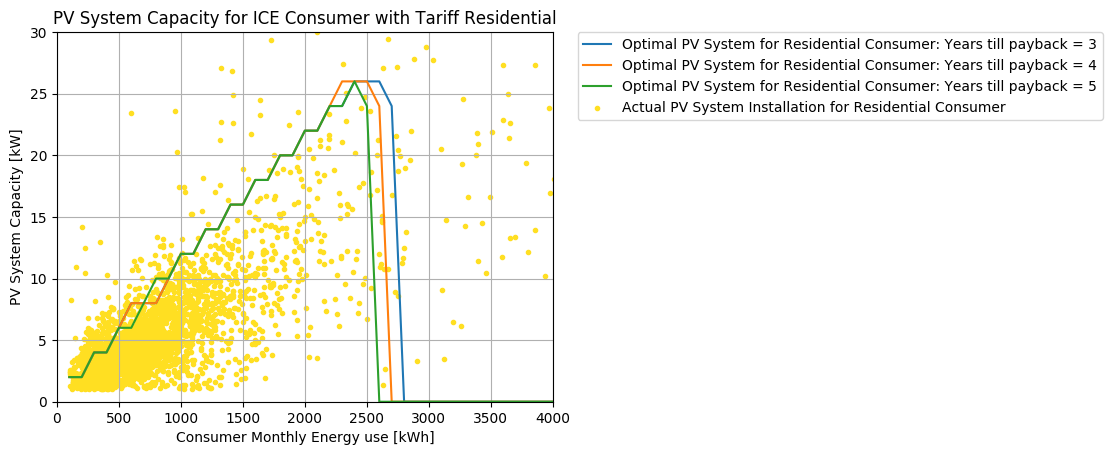

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [20]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, changing_years_model_predictions; model_descriptions=changing_years_descriptions, x_max=4000, y_max=30)

In [26]:
both_inc_model_predictions = []
both_inc_descriptions = []
all_aprs = [0.085, 0.1, 0.12]
all_years = [3,4,5]
for i in 1:length(all_aprs)
    apr = all_aprs[i]
    yrs = all_years[i]
    new_BAC1 = Financial(0.045, apr, yrs, 0.25, 600.0);
    res_model_predictions = []
    for (ix, co) in enumerate(res_consumption)
        ice_residential.econsumption = co; get_pmax(ice_residential);
        res = optimal_pv(ice_residential, PVRes, 0.0:2:30, new_BAC1, tariff_increase = true)
        push!(res_model_predictions, res[1][2])
    end
    push!(both_inc_model_predictions, res_model_predictions)
    push!(both_inc_descriptions, string("APR = ", apr, ", Years = ", yrs))
end

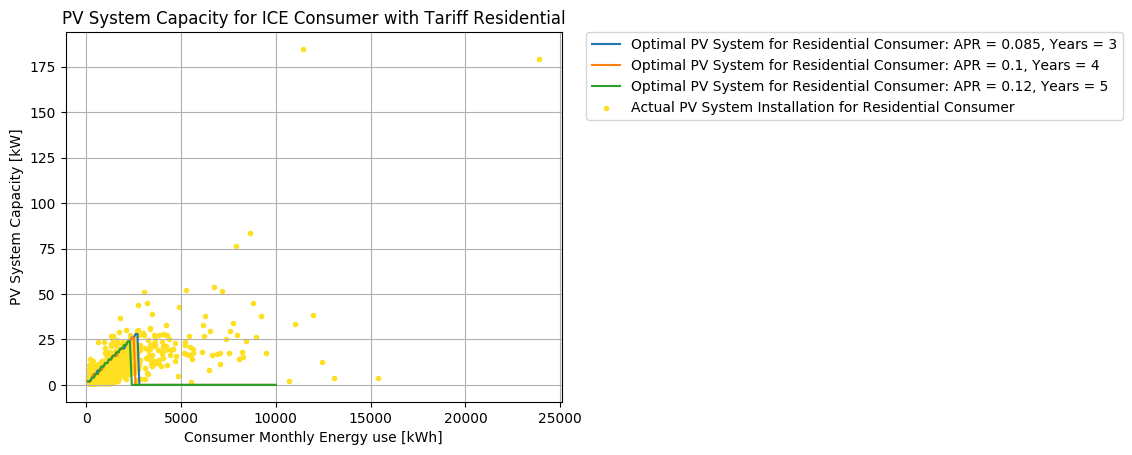

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [27]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, both_inc_model_predictions; model_descriptions=both_inc_descriptions)

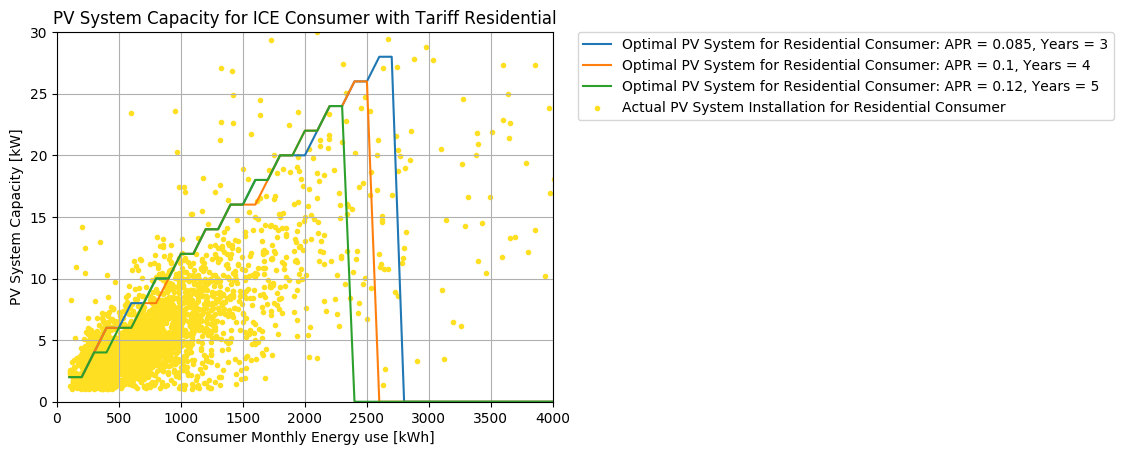

PyObject Text(0.5, 1, 'PV System Capacity for ICE Consumer with Tariff Residential')

In [28]:
plot_single_tariff_category_per_company_with_model_prediction(all_ice, "Residential", "ICE", res_consumption, both_inc_model_predictions; model_descriptions=both_inc_descriptions, x_max=4000,y_max=30)